<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/MN_Gen_Alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#algoritmo genetico
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import string
def listAlphabet():
  return list(string.ascii_uppercase)
print(len(listAlphabet()))

26


In [6]:
def etiquetas(N):
    col_labels=listAlphabet()
    k=int(np.floor(N/26))
    r=N%26
    if(k>0):
        m=0
        for m in range(1,k):
            alfa=listAlphabet()
            for i in range(len(alfa)):
                alfa[i]=alfa[i]+str(m)
                col_labels.append(alfa[i])
    
        alfa=listAlphabet()
        for i in range(0,r):
            alfa[i]=alfa[i]+str(m+1)
            col_labels.append(alfa[i])
    else:
        return(listAlphabet())
    return(col_labels)

In [7]:
def amenazas(c):#c es una permutacion de (1,2,...,N)
    N=len(c)
    #La reina i esta en (i,c[i]).
    num_amenazas=[]
    amenazas=[]
    for i in range(N):
        amenazas_i=[]
        num_amenazas_i=0
        for j in range(N):
            if(i!=j and abs(c[i]-c[j])==abs(i-j)):
                num_amenazas_i+=1
                amenazas_i.append(j+1)
        num_amenazas.append(num_amenazas_i)
        amenazas.append(amenazas_i)
    return amenazas
def print_reinas(N,config,amenazas):
    nrows, ncols = N,N
    board = np.zeros((N,N,3))
    board += 0.5 # "Black" color
    board[::2, ::2] = 1 # "White" color
    board[1::2, 1::2] = 1 # "White" color
    positions =np.array(config)-1
    #np.random.permutation(range(0,8))
    print(np.array(positions)+1)
    positions=positions.tolist()
    #fila, columna.
    fig, ax = plt.subplots()
    ax.imshow(board, interpolation='nearest')
    queen = plt.imread('queen.png')
    queen_roja = plt.imread('queen_roja.png')
    extent = np.array([-0.4, 0.4, -0.4, 0.4])
    for x, y in enumerate(positions):
        if(len(amenazas[x])>0):
            ax.imshow(queen_roja, extent=extent + [x, x, y, y])
        else:
            ax.imshow(queen, extent=extent + [x, x, y, y])
    col_labels=etiquetas(N)
    row_labels=range(1,nrows+1)
    plt.xticks(range(ncols), col_labels)
    plt.yticks(range(nrows), row_labels)
    ax.axis('image')
    plt.show()
def val_aptitud(c):
    valor=0
    for i in range(len(c)):
        valor+=len(c[i])
    return valor/2
def order_1_crossover(p1,p2):
    temp_p2=np.copy(p2)
    temp_p2=temp_p2.tolist()
    a1,a2=np.random.permutation(range(1,len(p1)+1))[0:2]
    p1_1=p1.index(a1)
    p1_2=p1.index(a2)
    indices=sorted([p1_1,p1_2])
    hijo=[-1]*len(p1)
    for i in range(indices[0],indices[1]+1):
        hijo[i]=p1[i]
        temp_p2.remove(p1[i])
    for j in range(len(p1)):
        if(hijo[j]<0):
            hijo[j]=temp_p2[0]
            temp_p2.remove(hijo[j])
    return(hijo)
def mutation(hijo,mu=0.1):
    mu_r=np.random.uniform(0,1)
    if(mu_r<mu):
        print("hay mutacion")
        a1=np.random.choice(range(1,len(hijo)))
        a2=np.random.choice(range(1,len(hijo)))
        while(a2==a1):
            a2=np.random.choice(range(1,len(hijo)))
        h1=hijo[a1]
        h2=hijo[a2]
        hijo[a1]=h2
        hijo[a2]=h1
    return (hijo)

In [56]:
A=[[0],[1],[2]]
np.random.choice(A)

ValueError: ignored

In [70]:
def select_padres(poblacion):
    M=int(np.floor(len(poblacion)/2))
    aptitudes=[]
    for config in poblacion:
        aptitudes.append(val_aptitud(amenazas(config)))
    posibles_padres=[]
    temp_aptitudes=np.copy(aptitudes)
    temp_aptitudes=temp_aptitudes.tolist()
    for i in range(M):
        max=np.min(temp_aptitudes)
        if (poblacion[temp_aptitudes.index(max)] not in posibles_padres):
            posibles_padres.append(poblacion[temp_aptitudes.index(max)])
        temp_aptitudes[temp_aptitudes.index(max)]=100
    p1=posibles_padres[np.random.choice(range(0,len(posibles_padres)))]
    if(len(posibles_padres)<=1):
        p2=np.random.permutation(p1).tolist()
        print("hubo migracion")
    else:
        p2=posibles_padres[np.random.choice(range(0,len(posibles_padres)))]
        while(p2==p1):
            p2=posibles_padres[np.random.choice(range(0,len(posibles_padres)))]
    return ([aptitudes,p1,p2])
def generar_poblacion(N,k):
    poblacion=[]
    for i in range(k):
        poblacion.append(np.random.permutation(range(1,N+1)).tolist())
    return poblacion

In [58]:
def redefinir(original,nuevo):
    for i in range(len(original)):
        original[i]=nuevo[i]
    return original

In [59]:
def reinas(N,max_iter=20,**pob_inicial):
    count=0
    if(pob_inicial):
        if(type(pob_inicial['pob_inicial'])==type([])):
            poblacion=pob_inicial['pob_inicial']
        if(type(pob_inicial['pob_inicial'])==type(0)):
            tam_pob=pob_inicial['pob_inicial']
            poblacion=generar_poblacion(N,k=tam_pob)
    else:
        tam_pob=10
        poblacion=generar_poblacion(N,k=tam_pob)
    best=1
    while(count<max_iter and best>0):
        aptitudes,padre1,padre2=select_padres(poblacion)
        hijo=mutation(mutation(order_1_crossover(padre1,padre2),0.6),0.1)
        best=np.min(aptitudes)
        worst=np.max(aptitudes)
        if(count%50==0):
            print(" adaptado:",aptitudes)
            print_reinas(N,config=poblacion[aptitudes.index(best)],amenazas=amenazas(poblacion[aptitudes.index(best)]))
        redefinir(poblacion[aptitudes.index(worst)],hijo)
        count+=1
        poblacion=np.random.permutation(poblacion).tolist()
    if(count==max_iter or best==0):
        print("iteracion alcanzada",count)
        print("mejor adaptado:",best)
        aptitudes,i1,i2=select_padres(poblacion)
        print_reinas(N,config=poblacion[aptitudes.index(best)],amenazas=amenazas(poblacion[aptitudes.index(best)]))
    return(poblacion[aptitudes.index(best)])

hay mutacion
 adaptado: [17.0, 8.0, 7.0, 3.0, 4.0, 4.0, 4.0, 5.0, 2.0, 2.0]
[6 2 5 3 8 4 7 1]


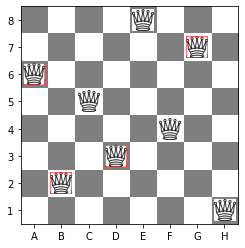

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
 adaptado: [2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0]
[2 5 7 1 3 6 4 8]


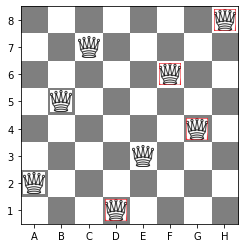

hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
hay mutacion
iteracion alcanzada 59
mejor adaptado: 0.0
[2 5 7 1 3 8 6 4]


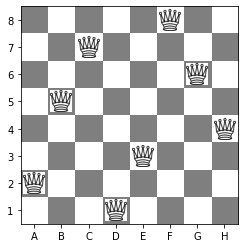

[2, 5, 7, 1, 3, 8, 6, 4]

In [73]:
reinas(N=8,max_iter=600)